#Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from itertools import permutations
import codecs

#Classes used

In [ ]:
class traveling_salesman:

  def __init__(self,n,bounds,costs=None):

    self.n = n
    self.bounds = bounds
    if costs is None:
      self.create_costs() 
    else:
      if len(costs[0]) is n and len(costs) is n:
        self.costs = costs
      else:
        raise Exception('Verify if the cost size is correct in relation to the route passed through the parameters.')
  
  def create_costs(self):

    costs = []

    for i in range(self.n):
      row = []
      for j in range(self.n):
        row.append(round(random.uniform(self.bounds[0],self.bounds[1]),2))
      
      costs.append(row)
    
    self.costs =  costs

  def hill_climbing(self,route):

      [all_routes,all_costs,improved,iteration] = [[],[],True,0]

      old_route = route.copy()
      old_cost = self.calculate_cost(old_route)
      new_route = old_route

      all_routes.append(old_route)
      all_costs.append(old_cost)

      while(improved):
        
        [new_route,new_cost] = self.swap_2_first(old_route,False) 
        
        if new_cost < old_cost:

          old_route = new_route
          old_cost = new_cost
          
          all_routes.append(old_route)
          all_costs.append(round(old_cost,2))

          iteration+=1
        
        else:
          improved = False
          

      return [all_costs,all_routes,iteration]

  def brute_force(self):

    all_routes = [[*per,per[0]] for per in list(permutations([vertex for vertex in range(self.n)]))]

    all_costs = []

    for route in all_routes:
      all_costs.append(round(self.calculate_cost(route),2))

    best_costs = min(all_costs)
    print(best_costs)
    best_route = all_routes[all_costs.index(best_costs)]

    return [best_route,best_costs,all_costs,all_routes]

  def generate_one_random_solution(self):

    solution = [vertex for vertex in range(self.n)]
    solution = random.sample(solution,self.n)
    solution.append(solution[0])

    return solution

  def greedy(self, initial_vertice = None):

    solution = [initial_vertice if initial_vertice is not None else randint(0,self.n-1)]
    [available_nodes,current_node,new_cost] = [[i for i in range(0,self.n)],solution[0],0]

    available_nodes.remove(current_node)
    
    for i in range(0,self.n-1):

      available_node_costs = [self.costs[current_node][j] for j in available_nodes]
      
      next_node = available_nodes[available_node_costs.index(min(available_node_costs))]
      #numpy argmin
      solution.append(next_node)
      new_cost += self.costs[current_node][next_node]

      available_nodes.remove(next_node)
      current_node = next_node

    solution.append(solution[0])
    new_cost+=self.costs[next_node][solution[0]]

    return solution,new_cost

  def calculate_cost(self,solution):
    
    sum = 0
    for i in range(1,len(solution)):

      sum += self.costs[solution[i-1]][solution[i]]
    
    return sum

  def swap_2_first(self,route = None,warning_condition=True):

    # Swap 2 vertices until finding a better solution. 
    solution = route.copy() if route is not None else self.generate_one_random_solution()

    current_cost = self.calculate_cost(solution)

    for i in range(self.n-1):

      for j in range(i+1,self.n):

        new_solution = solution.copy()
        
        aux = new_solution[j]
        new_solution[j] = new_solution[i] #swap
        new_solution[i] = aux

        new_solution[self.n] = new_solution[0]

        new_cost = self.calculate_cost(new_solution)
        
        if new_cost < current_cost:  
          solution = new_solution
          current_cost = new_cost
          return [solution,current_cost]
      
      if warning_condition: print('\n swap warning: Não foi encontrado nenhuma solução melhor, retornando o original\n')
      return [solution,current_cost]

  def vnd(self,route,delta,max_iteration):

    old_cost = self.calculate_cost(route)
    old_route = route.copy()
    counter = 0
    improvement = True
    all_cost = [old_cost]

    while(improvement and counter<max_iteration):

      counter += 1
      [current_route,current_cost] = self.swap_2_first(old_route,False)

      if current_cost + delta < old_cost:
         old_cost = current_cost
         old_route = current_route.copy()
         
         all_cost.append(old_cost)
         continue
      else:
        improvement = False

      [current_route,current_cost] = self.opt_2(old_route)

      if current_cost + delta < old_cost:
        old_cost = current_cost
        old_route = current_route.copy()
        improvement = True

        all_cost.append(old_cost)

    return [old_route,round(old_cost,2),counter,all_cost]

  
  def opt_2(self,route):

    new_route = route.copy()
    node_number = len(route)
    new_costs = simulation.calculate_cost(route)
    costs =  self.costs

    for i in range(node_number-3):

      for j in range(i+2,node_number-1):

        if costs[route[i]][route[i+1]] + costs[route[j]][route[j+1]] > costs[route[i]][route[j]]+costs[route[i+1]][route[j+1]]:

          aux = route[j]
          route[j] = route[i+1]
          route[i+1] = aux

          new_costs = simulation.calculate_cost(route)
        
    return [route,new_costs]


  def opt_2_first(self,route,warning_condition=False):

      new_route = route.copy()
      node_number = len(route)
      new_costs = simulation.calculate_cost(route)
      costs =  self.costs

      for i in range(node_number-3):

        for j in range(i+2,node_number-1):

          if costs[route[i]][route[i+1]] + costs[route[j]][route[j+1]] > costs[route[i]][route[j]]+costs[route[i+1]][route[j+1]]:

            aux = route[j]
            route[j] = route[i+1]
            route[i+1] = aux

            new_costs = simulation.calculate_cost(route)

            return [route,new_costs]
      
      if warning_condition: print('Warning: Nenhum melhoramento encontrado')
          
      return [route,new_costs]

def plot_vertices(route,xs,ys,node_number,line_cor = 'black',cost_text=None,cost_matrix=None):

  plt.figure(figsize=(10,6))
  print(route)
  y_route = [ys[i] for i in route]
  plt.plot(route,y_route,line_cor)
  plt.plot(xs,ys,'ob')
  for i in range(node_number):
    plt.text(route[i]-0.2,y_route[i]+0.2,'Node '+str(route[i]))
  if cost_text is not None:
    for i in range(node_number):
      plt.text(cost_text[i][0],cost_text[i][1],str(cost_matrix[cost_text[i][2]][cost_text[i][3]]))
  plt.show()

def convex_combination_of_edges(xs,ys,alpha,node_number):

  if alpha>1 or alpha < 0: raise Exception('alpha inválido')

  edges = []
  ys = [ys[i] for i in xs]

  for i in range(node_number):

    edges.append([alpha*xs[i]+(1-alpha)*xs[i+1],alpha*ys[i]+(1-alpha)*ys[i+1],xs[i],xs[i+1]])

  return edges


In [ ]:
node_number = 7
simulation = traveling_salesman(node_number,[10,300])
initial_route = simulation.generate_one_random_solution()
print(f'A rota aleatoria gerada foi {initial_route} e o seu custo é {simulation.calculate_cost(initial_route)}')

route,cost = simulation.greedy()
simulation.calculate_cost(route)

print(f'A rota gerada pela seleção do melhor caminho foi {route} e o seu custo é {round(simulation.calculate_cost(route),2)} e tbm deve ser {cost}')

[route,costs] = simulation.swap_2_first(initial_route) 

print(f'A melhor encontrada apos alguns swaps {route} e o seu custo é {round(simulation.calculate_cost(route),2)} e tbm deve ser {costs}')

[all_costs,all_routes,iteration] = simulation.hill_climbing(initial_route)

best_cost = min(all_costs)
best_route = all_routes[all_costs.index(best_cost)]

print(f'A melhor rota por Hill Climbing com swap foi {best_route} e o seu custo é {round(simulation.calculate_cost(best_route),2)} e tbm deve ser {best_cost}')

[vnd_route,vnd_cost,iterations,all_cost] = simulation.vnd(initial_route,0.01,100)

print(f'vnd: {vnd_route}, {vnd_cost} ')

[opt_route,opt_route_costs] = simulation.opt_2_first(initial_route)

print(f'2 opt {opt_route}, {opt_route_costs}')


A rota aleatoria gerada foi [4, 0, 3, 1, 2, 5, 6, 4] e o seu custo é 1487.04
A rota gerada pela seleção do melhor caminho foi [4, 6, 0, 3, 1, 5, 2, 4] e o seu custo é 830.76 e tbm deve ser 830.7599999999999
A melhor encontrada apos alguns swaps [0, 4, 3, 1, 2, 5, 6, 0] e o seu custo é 1369.05 e tbm deve ser 1369.05

 swap warning: Não foi encontrado nenhuma solução melhor, retornando o original

A melhor rota por Hill Climbing com swap foi [1, 4, 3, 0, 2, 5, 6, 1] e o seu custo é 1132.24 e tbm deve ser 1132.24
vnd: [1, 5, 3, 0, 6, 2, 4, 1], 1132.24 
2 opt [4, 3, 0, 1, 2, 5, 6, 4], 1611.35


In [ ]:
print(simulation.brute_force())

605.62
[[0, 6, 2, 1, 3, 4, 5, 0], 605.62, [882.41, 868.98, 1120.11, 932.06, 671.84, 914.36, 1050.25, 810.55, 980.64, 823.21, 915.14, 1101.55, 1062.76, 886.14, 917.53, 916.76, 804.94, 829.87, 667.67, 939.32, 818.48, 883.21, 979.96, 935.12, 954.84, 941.41, 1048.39, 860.34, 723.07, 965.59, 1043.09, 926.34, 797.94, 729.64, 762.36, 855.11, 1045.41, 847.59, 1177.47, 967.34, 940.46, 1026.07, 680.24, 807.74, 832.52, 657.97, 839.66, 1008.37, 1143.11, 903.41, 1097.19, 939.76, 928.37, 1114.78, 934.4, 817.65, 921.65, 853.35, 659.8, 752.55, 775.01, 694.61, 987.74, 783.74, 770.45, 766.57, 862.38, 950.8, 799.29, 857.14, 895.92, 1044.91, 1054.33, 877.71, 995.9, 995.13, 873.54, 898.47, 1288.26, 1090.44, 1273.19, 1063.06, 1047.61, 1133.22, 1207.59, 1127.19, 1121.83, 917.83, 1061.2, 1057.32, 949.38, 991.34, 1030.44, 1052.02, 1119.93, 970.43, 645.42, 917.07, 813.26, 877.99, 859.72, 814.88, 726.48, 853.98, 814.73, 640.18, 851.0, 1019.71, 941.85, 1030.27, 733.14, 790.99, 708.09, 857.08, 804.84, 846.8, 1038.

#Generating a random route and calculating the distance among all dots.

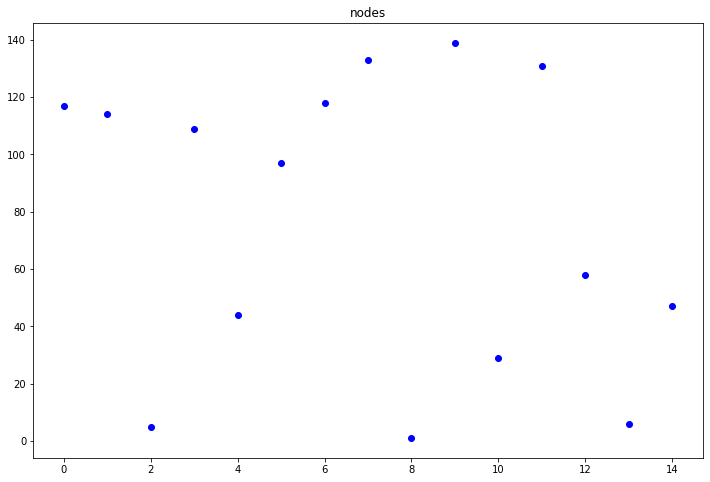

In [ ]:
node_number = 15

xs = [x for x in range(node_number)]
ys = [randint(0,10*node_number) for x in range(node_number)]

calculate_distance = lambda x_dif,y_dif: (x_dif**2+y_dif**2)**(1/2)

distances = []

for i in range(node_number):
    row = []
    for j in range(node_number):
      if i is not j:
        row.append(round(calculate_distance(xs[i]-xs[j],ys[i]-ys[j]),4))
      else:
        row.append(float('inf'))
    
    distances.append(row)

plt.figure(figsize=(12,8))
plt.plot(xs,ys,'ob')
plt.title('nodes')
plt.show()


## Showing all costs and setting up the parameters.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,inf,3.1623,112.0179,8.5440,73.1095,20.6155,6.0828,17.4642,116.2755,23.7697,88.5664,17.8045,60.2080,111.7587,71.3863
1,3.1623,inf,109.0046,5.3852,70.0643,17.4642,6.4031,19.9249,113.2166,26.2488,85.4751,19.7231,57.0701,108.6646,68.2495
2,112.0179,109.0046,inf,104.0048,39.0512,92.0489,113.0708,128.0976,7.2111,134.1827,25.2982,126.3210,53.9351,11.0454,43.6807
3,8.5440,5.3852,104.0048,inf,65.0077,12.1655,9.4868,24.3311,108.1157,30.5941,80.3057,23.4094,51.7880,103.4843,62.9682
4,73.1095,70.0643,39.0512,65.0077,inf,53.0094,74.0270,89.0505,43.1856,95.1315,16.1555,87.2812,16.1245,39.0512,10.4403
5,20.6155,17.4642,92.0489,12.1655,53.0094,inf,21.0238,36.0555,96.0469,42.1900,68.1836,34.5254,39.6232,91.3510,50.8035
6,6.0828,6.4031,113.0708,9.4868,74.0270,21.0238,inf,15.0333,117.0171,21.2132,89.0898,13.9284,60.2993,112.2185,71.4493
7,17.4642,19.9249,128.0976,24.3311,89.0505,36.0555,15.0333,inf,132.0038,6.3246,104.0433,4.4721,75.1665,127.1417,86.2844
8,116.2755,113.2166,7.2111,108.1157,43.1856,96.0469,117.0171,132.0038,inf,138.0036,28.0713,130.0346,57.1402,7.0711,46.3897
9,23.7697,26.2488,134.1827,30.5941,95.1315,42.1900,21.2132,6.3246,138.0036,inf,110.0045,8.2462,81.0555,133.0601,92.1358


A rota aleatoria gerada foi [11, 6, 13, 2, 8, 0, 12, 1, 3, 14, 10, 4, 5, 7, 9, 11] e o seu custo é 584.5407000000001
[11, 6, 13, 2, 8, 0, 12, 1, 3, 14, 10, 4, 5, 7, 9, 11]


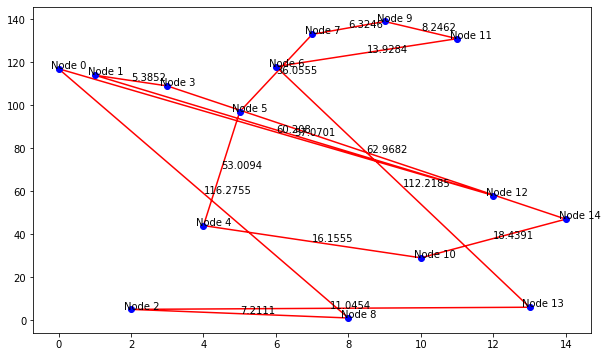

In [ ]:
simulation = traveling_salesman(node_number,[10,300],distances)
initial_route = simulation.generate_one_random_solution()
display(pd.DataFrame(simulation.costs))
print(f'A rota aleatoria gerada foi {initial_route} e o seu custo é {simulation.calculate_cost(initial_route)}')


cost_texts = convex_combination_of_edges(initial_route,ys,0.5,node_number)

plot_vertices(initial_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


#Opt 2

[14, 25, 81, 88, 98, 95, 82, 62, 59, 67, 86, 80, 85, 49, 75, 78, 76, 70, 68, 77, 96, 16, 27, 2, 34, 60, 52, 55, 1, 33, 21, 31, 30, 28, 51, 63, 99, 38, 40, 15, 4, 23, 58, 94, 84, 79, 72, 93, 50, 26, 35, 13, 19, 11, 89, 91, 74, 71, 57, 46, 44, 69, 61, 97, 43, 17, 20, 12, 37, 47, 9, 0, 73, 65, 54, 36, 83, 90, 87, 8, 5, 10, 45, 6, 41, 66, 48, 39, 32, 22, 29, 42, 53, 92, 64, 56, 18, 7, 3, 24, 14]


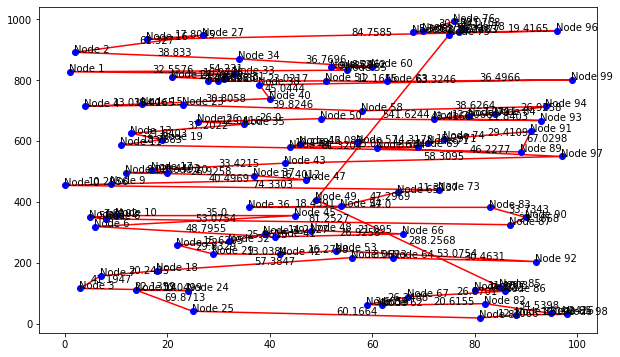

[14, 25, 81, 88, 98, 95, 82, 62, 59, 67, 86, 80, 85, 49, 75, 78, 76, 70, 68, 77, 96, 16, 27, 2, 34, 60, 52, 55, 1, 33, 21, 31, 30, 28, 51, 63, 99, 38, 40, 15, 4, 23, 58, 94, 84, 79, 72, 93, 50, 26, 35, 13, 19, 11, 89, 91, 74, 71, 57, 46, 44, 69, 61, 97, 43, 17, 20, 12, 37, 47, 9, 0, 73, 65, 54, 36, 83, 90, 87, 8, 5, 10, 45, 6, 41, 66, 48, 39, 32, 22, 29, 42, 53, 92, 64, 56, 18, 7, 3, 24, 14] 3563.3152


In [ ]:
#swap_route=initial_route
[route_opt2,new_costs] = simulation.opt_2(initial_route)
cost_texts = convex_combination_of_edges(route_opt2,ys,0.5,node_number)

plot_vertices(route_opt2,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)
print(route_opt2,new_costs)


[34, 62, 58, 53, 74, 93, 66, 7, 17, 20, 47, 98, 56, 8, 9, 11, 18, 71, 89, 40, 44, 54, 91, 96, 50, 19, 13, 45, 24, 25, 32, 70, 80, 43, 36, 61, 77, 75, 12, 15, 21, 22, 33, 67, 55, 41, 39, 6, 3, 23, 29, 76, 82, 95, 72, 46, 42, 2, 16, 27, 37, 64, 88, 97, 38, 60, 86, 85, 68, 63, 73, 52, 35, 14, 30, 84, 49, 5, 26, 94, 81, 57, 87, 59, 79, 4, 10, 1, 28, 31, 51, 78, 92, 99, 90, 83, 69, 0, 48, 65, 34]


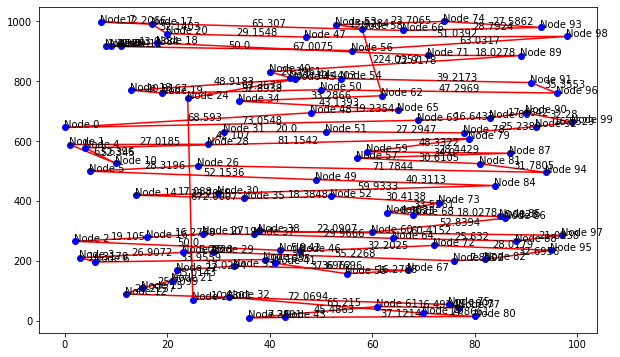

[34, 62, 58, 53, 74, 93, 66, 7, 17, 20, 47, 98, 56, 8, 9, 11, 18, 71, 89, 40, 44, 54, 91, 96, 50, 19, 13, 45, 24, 25, 32, 70, 80, 43, 36, 61, 77, 75, 12, 15, 21, 22, 33, 67, 55, 41, 39, 6, 3, 23, 29, 76, 82, 95, 72, 46, 42, 2, 16, 27, 37, 64, 88, 97, 38, 60, 86, 85, 68, 63, 73, 52, 35, 14, 30, 84, 49, 5, 26, 94, 81, 57, 87, 59, 79, 4, 10, 1, 28, 31, 51, 78, 92, 99, 90, 83, 69, 0, 48, 65, 34] 4051.8057999999983


In [ ]:
#swap_route=initial_route
[route_opt2_first,new_costs] = simulation.opt_2_first(initial_route)
cost_texts = convex_combination_of_edges(route_opt2_first,ys,0.5,node_number)

plot_vertices(route_opt2,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)
print(route_opt2,new_costs)

#Greedy

A rota gerada pela seleção do melhor caminho foi [12, 20, 17, 37, 47, 9, 0, 49, 54, 36, 45, 10, 5, 8, 6, 39, 41, 32, 22, 29, 42, 53, 56, 64, 92, 18, 7, 3, 14, 24, 67, 59, 62, 82, 95, 98, 88, 81, 25, 80, 86, 85, 66, 48, 87, 90, 83, 65, 73, 43, 44, 46, 57, 71, 69, 61, 89, 97, 74, 91, 93, 79, 84, 72, 50, 35, 26, 13, 19, 11, 58, 94, 40, 23, 15, 4, 38, 30, 28, 31, 21, 33, 55, 52, 60, 34, 2, 16, 27, 68, 70, 77, 78, 75, 96, 76, 1, 51, 63, 99, 12] e o seu custo é 3277.27 e tbm deve ser 3277.269900000001
[12, 20, 17, 37, 47, 9, 0, 49, 54, 36, 45, 10, 5, 8, 6, 39, 41, 32, 22, 29, 42, 53, 56, 64, 92, 18, 7, 3, 14, 24, 67, 59, 62, 82, 95, 98, 88, 81, 25, 80, 86, 85, 66, 48, 87, 90, 83, 65, 73, 43, 44, 46, 57, 71, 69, 61, 89, 97, 74, 91, 93, 79, 84, 72, 50, 35, 26, 13, 19, 11, 58, 94, 40, 23, 15, 4, 38, 30, 28, 31, 21, 33, 55, 52, 60, 34, 2, 16, 27, 68, 70, 77, 78, 75, 96, 76, 1, 51, 63, 99, 12]


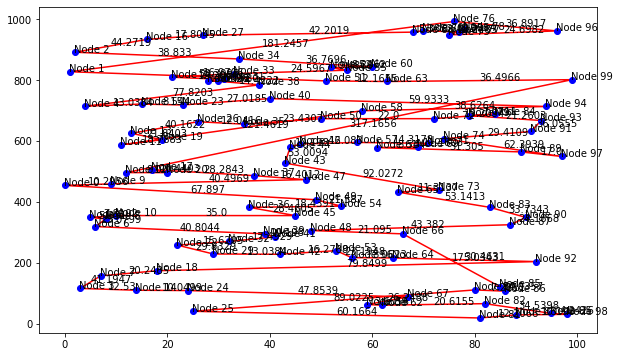

In [ ]:
route_greedy,cost = simulation.greedy()
simulation.calculate_cost(route_greedy)

print(f'A rota gerada pela seleção do melhor caminho foi {route_greedy} e o seu custo é {round(simulation.calculate_cost(route_greedy),2)} e tbm deve ser {cost}')

cost_texts = convex_combination_of_edges(route_greedy,ys,0.5,node_number)

plot_vertices(route_greedy,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)



# Hill Climbing

A melhor rota por Hill Climbing com swap foi [33, 27, 16, 34, 60, 52, 55, 63, 94, 79, 17, 12, 0, 10, 5, 8, 6, 22, 32, 53, 41, 39, 45, 36, 9, 90, 29, 18, 7, 3, 14, 24, 25, 81, 62, 59, 97, 93, 99, 96, 76, 77, 68, 78, 70, 75, 2, 1, 15, 23, 50, 35, 26, 72, 13, 19, 11, 37, 20, 73, 83, 66, 64, 56, 92, 54, 49, 47, 43, 61, 69, 71, 74, 58, 38, 31, 30, 40, 46, 44, 65, 87, 57, 91, 48, 42, 80, 67, 85, 86, 82, 89, 4, 28, 51, 84, 88, 95, 21, 98, 33] e o seu custo é 9733.65 e tbm deve ser 9733.65
Quantidade de iterações necessárias 351
[33, 27, 16, 34, 60, 52, 55, 63, 94, 79, 17, 12, 0, 10, 5, 8, 6, 22, 32, 53, 41, 39, 45, 36, 9, 90, 29, 18, 7, 3, 14, 24, 25, 81, 62, 59, 97, 93, 99, 96, 76, 77, 68, 78, 70, 75, 2, 1, 15, 23, 50, 35, 26, 72, 13, 19, 11, 37, 20, 73, 83, 66, 64, 56, 92, 54, 49, 47, 43, 61, 69, 71, 74, 58, 38, 31, 30, 40, 46, 44, 65, 87, 57, 91, 48, 42, 80, 67, 85, 86, 82, 89, 4, 28, 51, 84, 88, 95, 21, 98, 33]


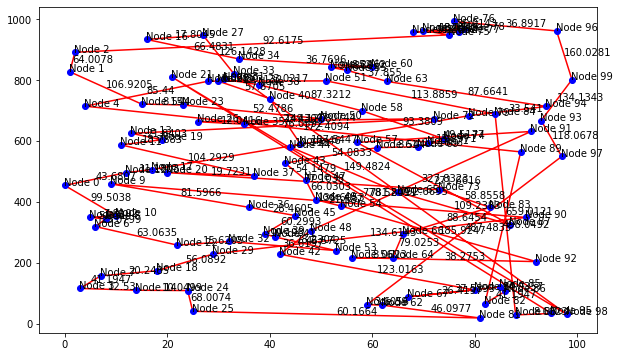

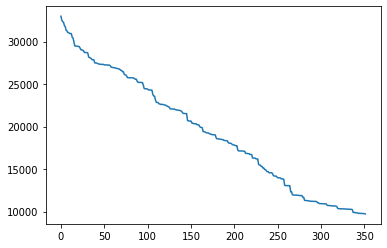

In [ ]:

[all_costs,all_routes,iterations] = simulation.hill_climbing(initial_route)

best_cost = min(all_costs)
best_route = all_routes[all_costs.index(best_cost)]

print(f'A melhor rota por Hill Climbing com swap foi {best_route} e o seu custo é {round(simulation.calculate_cost(best_route),2)} e tbm deve ser {best_cost}')
print(f'Quantidade de iterações necessárias {iterations}')
cost_texts = convex_combination_of_edges(best_route,ys,0.5,node_number)

plot_vertices(best_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)


plt.plot(all_costs)
plt.show()


#VND

[33, 55, 52, 60, 75, 96, 76, 78, 77, 70, 68, 27, 16, 2, 34, 1, 21, 28, 30, 38, 40, 23, 15, 4, 26, 35, 13, 19, 11, 17, 20, 12, 9, 0, 36, 45, 10, 5, 8, 6, 32, 22, 29, 18, 7, 3, 14, 24, 25, 81, 88, 98, 95, 82, 62, 59, 67, 86, 80, 85, 92, 64, 56, 42, 53, 41, 39, 48, 66, 87, 90, 83, 54, 49, 65, 73, 47, 37, 43, 97, 89, 69, 61, 44, 46, 57, 71, 74, 91, 93, 84, 79, 72, 50, 58, 94, 99, 63, 51, 31, 33] 2693.96 358 2693.9622999999997
[33, 55, 52, 60, 75, 96, 76, 78, 77, 70, 68, 27, 16, 2, 34, 1, 21, 28, 30, 38, 40, 23, 15, 4, 26, 35, 13, 19, 11, 17, 20, 12, 9, 0, 36, 45, 10, 5, 8, 6, 32, 22, 29, 18, 7, 3, 14, 24, 25, 81, 88, 98, 95, 82, 62, 59, 67, 86, 80, 85, 92, 64, 56, 42, 53, 41, 39, 48, 66, 87, 90, 83, 54, 49, 65, 73, 47, 37, 43, 97, 89, 69, 61, 44, 46, 57, 71, 74, 91, 93, 84, 79, 72, 50, 58, 94, 99, 63, 51, 31, 33]


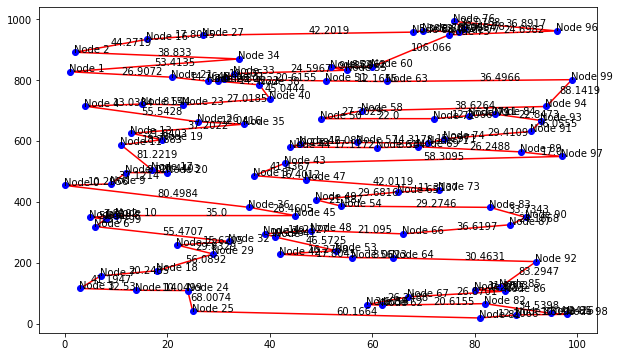

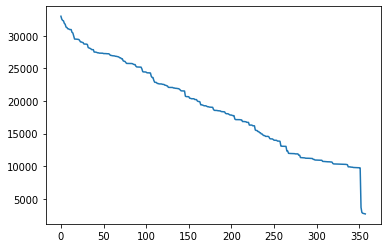

In [ ]:
[vnd_route,vnd_cost,iterations,all_costs] = simulation.vnd(initial_route,0.01,1000)

print(vnd_route,vnd_cost,iterations,simulation.calculate_cost(vnd_route))

cost_texts = convex_combination_of_edges(vnd_route,ys,0.5,node_number)

plot_vertices(vnd_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)

plt.plot(all_costs)
plt.show()

#brute force

Warning: Be aware of the route length because if this one is larger than 13, the Brute Force method can use all your memory RAM and crash your pc.

126.84
A melhor rota por Hill Climbing com swap foi [0, 1, 5, 4, 3, 6, 7, 2, 0] e o seu custo é 126.84 e tbm deve ser 126.84
[0, 1, 5, 4, 3, 6, 7, 2, 0]


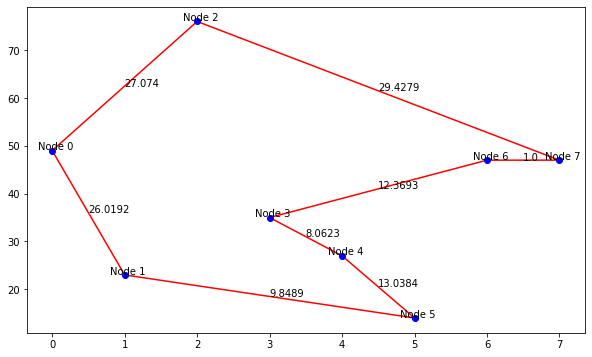

In [ ]:
[best_route,best_cost,a,b] = simulation.brute_force()

print(f'A melhor rota por Hill Climbing com swap foi {best_route} e o seu custo é {round(simulation.calculate_cost(best_route),2)} e tbm deve ser {best_cost}')


cost_texts = convex_combination_of_edges(best_route,ys,0.5,node_number)

plot_vertices(best_route,xs,ys,node_number,'red',cost_text=cost_texts,cost_matrix=simulation.costs)
